In [100]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

### Load hexagons (resolution of 5)

In [74]:
# load hex grid 
hexgrid_res5 = gpd.read_file("../Data/hex_res5/")

In [97]:
# find centroid and area of each hex cell 
hexgrid_res5['centroid'] = hexgrid_res5.centroid
hexgrid_res5['area'] = hexgrid_res5.area

In [98]:
# avg cell size of H3 hexagon (res5)
np.mean(hexgrid_res5['area'] / (10**3)**2)

236.17268428954762

In [99]:
# avg cell size of ERA5 (Resolution: 11132 meters)
11132 ** 2  / (10**3)**2

123.921424

The average cell size of H3 hexagon (resolution = 5) is about 236 km^2, which is very close to the official documentation (https://h3geo.org/docs/core-library/restable/). The average cell size of ERA5 is about 123 km^2. That is, each H3 hexagon covers/overlaps with about 2 ERA5 cells. 

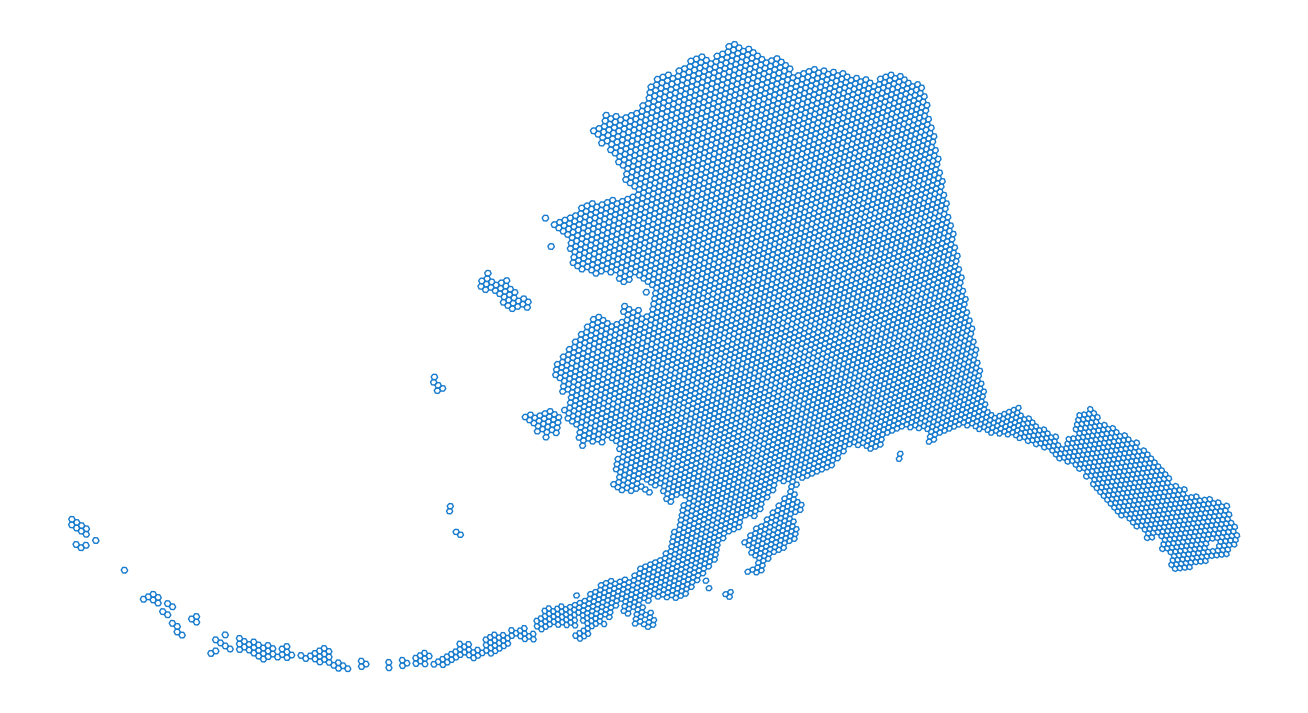

In [207]:
# visualize centroid and hexagon
fig, ax = plt.subplots(figsize=(21, 9))
hexgrid_res5['geometry'].plot(ax = ax, facecolor='none', edgecolor='#187bcd')
hexgrid_res5['centroid'].plot(ax = ax, facecolor='black', markersize = 0.5)
ax.set_axis_off()

### Load city info used in Heat Pump Calculator (HPC)

In [122]:
# load city info used in Heat Pump Calculator (HPC)
city_url = 'https://github.com/leungkp/akwlib-export/blob/main/data/v01/city.csv' + '?raw=true'
city_HPC = pd.read_csv(city_url)

In [183]:
# convert lat and long into a geometry / GDP object
geometry = [Point(xy) for xy in zip(city_HPC['Longitude'], city_HPC['Latitude'])]
city_HPC = gpd.GeoDataFrame(city_HPC, geometry = geometry, crs = 'epsg:4267')
city_HPC = city_HPC.to_crs('epsg:3338')

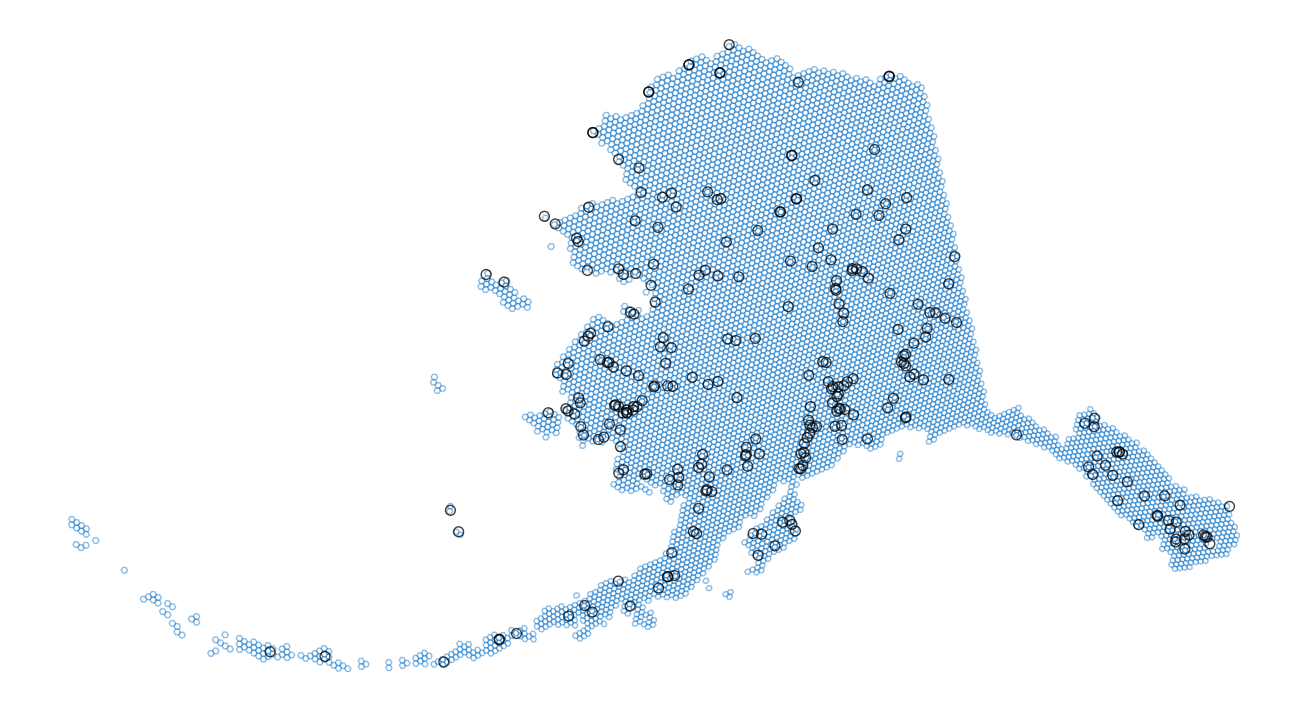

In [185]:
# visualize cities used in HPC and hexagons
fig, ax = plt.subplots(figsize=(21, 9))
hexgrid_res5['geometry'].plot(ax = ax, facecolor='none', edgecolor='#187bcd', alpha=0.5)
city_HPC.plot(ax = ax, facecolor='none', edgecolor="black", markersize = 50, alpha=0.75)
ax.set_axis_off()


### Spatial joining